In [147]:
import requests
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date


ticker = 'AAPL'
current = yf.Ticker(ticker)

current_year = date.today().year

#quarterly data
cashflow = current.quarterly_cashflow
financials = current.quarterly_financials
balance_sheet = current.quarterly_balance_sheet

#annual data
years_index = current.shares.index.to_list() # list of years to use as keys
years_index.append(current_year)
annual_earnings = current.earnings["Earnings"].to_dict() # earnings dict with years as keys
shares = current.shares['BasicShares'].to_dict() # shares dict with years as keys

fivey_hist = current.history(period="5y")

In [87]:
#method to get quarterly filing dates. Returns list of dates
file_dates = [date.today().strftime('%Y-%m-%d')]
for date in balance_sheet.columns.to_list():
    while date.strftime('%Y-%m-%d') not in fivey_hist["Close"].keys():
        date = date - pd.Timedelta(days=1)
    file_dates.insert(0, date.strftime('%Y-%m-%d'))

#list of close prices at quarterly filing date
quarterly_close_price = [fivey_hist["Close"].loc[date] for date in file_dates]

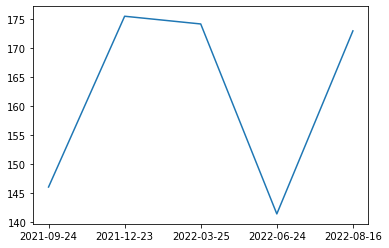

In [212]:
plt.plot(file_dates, quarterly_close_price)

In [58]:
print(current.info['trailingPE'])
print(current.info['currentPrice'])
print(current.info['trailingEps'])
print(current.info['currentPrice']/current.info['trailingEps'])
print(current.earnings)
print(94680000000/16701272000)

28.599998
173.03
6.05
28.6
           Revenue     Earnings
Year                           
2018  265595000000  59531000000
2019  260174000000  55256000000
2020  274515000000  57411000000
2021  365817000000  94680000000
5.669029281123018


Text(0.5, 1.0, 'Annual EPS')

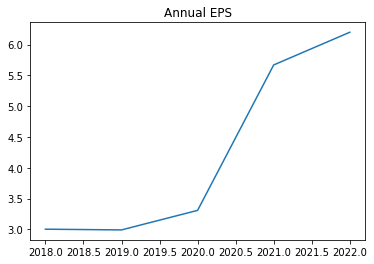

In [149]:
# estimating [current_year] annual data using quarterly data
estimated_earnings = current.quarterly_earnings['Earnings'].sum()
current_shares = current.info['sharesOutstanding']


annual_earnings[current_year] = estimated_earnings
shares[current_year] = current_shares

# EPS per year dictionary
annual_EPS = {}
for year in years_index:
    eps = annual_earnings.get(year)/shares.get(year)
    annual_EPS[year] = eps

plt.plot(years_index, annual_EPS.values())
plt.title('Annual EPS')

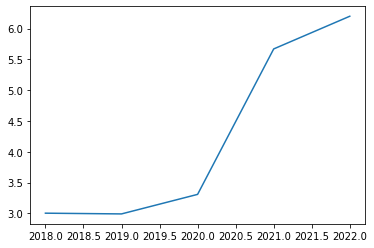

In [208]:
# Getiing PE data for annual_interval timeframe
year_index_timestamp = [pd.Timestamp(year = y, month = 1, day = 1) for y in years_index]

yearly_close = {}
for i in range(len(year_index_timestamp) - 1):
    start = year_index_timestamp[i]
    cutoff = year_index_timestamp[i+1]
    
    close = current.history(start = start, end=cutoff)
    yearly_close[year_index_timestamp[i]] = close

yearly_close[year_index_timestamp[-1]] = current.history(start = year_index_timestamp[-1], end=None)
    
yearly_close.


NameError: name 'Timestamp' is not defined